In [1]:
import pandas as pd
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.distributions as dist
import biogeme.models as models
import biogeme.results as res

In [5]:
# data = pd.read_csv('./../log_data.dat',sep='\t', decimal='.')
data = pd.read_csv('./../log_data-sin_filtrar.dat',sep='\t', decimal='.')

data = data[(data['question'] == 1) & (data.gender != 99)]
data.loc[:,'choice'] = data.loc[:,'choice'].replace({99:3})

In [6]:
data.shape

(7587, 61)

In [7]:
# data = data[(data.gender != 99)]
# answers_per_gender = pd.pivot_table(data, index=['transport'], columns=['question'], aggfunc='count', fill_value=0, margins = True)
# answers_per_gender.T

In [8]:
data.describe().T.iloc[:40,:]

count        mean         std         min         25%  \
question      7587.0    1.000000    0.000000    1.000000    1.000000   
choice        7587.0    1.757480    0.722849    1.000000    1.000000   
user          7587.0  818.245947  450.445421    1.000000  383.000000   
age           7587.0   30.254382    9.782657   12.000000   23.000000   
gender        7587.0    0.421247    0.493792    0.000000    0.000000   
education     7587.0    4.645051    1.170149    1.000000    3.000000   
transport     7587.0    2.847502    0.937583    1.000000    2.000000   
N_Bicyclist   7587.0   -0.000002    0.010073   -0.154173    0.000000   
S_Bicyclist   7587.0    0.000329    0.029909   -0.194216   -0.009664   
N_Building    7587.0    0.000938    0.177609   -0.444823   -0.126085   
S_Building    7587.0    0.000059    0.135302   -0.415854   -0.094758   
N_Car         7587.0    0.000278    0.079144   -0.322331   -0.034726   
S_Car         7587.0   -0.000086    0.136014   -0.384678   -0.096107   
N_Fence       7587.0    0.001338    0.110652   -0.371077   -0.072418   
S_Fence       7587.0   -0.000104    0.106680   -0.376290   -0.068996   
N_Pavement    7587.0    0.000356    0.061393   -0.424809   -0.004961   
S_Pavement    7587.0   -0.000964    0.086648   -0.359884   -0.055092   
N_Pedestrian  7587.0    0.000005    0.027293   -0.180699   -0.006053   
S_Pedestrian  7587.0   -0.000126    0.056037   -0.216393   -0.034811   
N_Pole        7587.0    0.001004    0.077431   -0.251392   -0.052786   
S_Pole        7587.0    0.000545    0.063067   -0.232198   -0.042569   
N_Road        7587.0   -0.000286    0.054649   -0.383303    0.000000   
S_Road        7587.0   -0.001030    0.083805   -0.400963   -0.040959   
N_SignSymbol  7587.0   -0.000766    0.085187   -0.302774   -0.055565   
S_SignSymbol  7587.0    0.000319    0.070511   -0.317216   -0.043618   
N_Sky         7587.0    0.001346    0.201823   -0.441647   -0.140670   
S_Sky         7587.0   -0.000345    0.080606   -0.349993   -0.010348   
N_Tree        7587.0   -0.001773    0.102341   -0.456319   -0.047648   
S_Tree        7587.0    0.001246    0.140027   -0.435367   -0.094539   
blobs         7587.0    0.051799    7.907608  -97.000000   -4.000000   
edges         7587.0   -0.000123    0.035910   -0.137957   -0.021004   
mean_bn       7587.0    0.000000    0.000000    0.000000    0.000000   
mean_h        7587.0   -0.237726   15.529886  -65.346690  -10.238197   
mean_l        7587.0    0.123067   23.970412 -118.566470  -15.104962   
mean_s        7587.0   -0.096257   19.281222 -115.752703  -12.929977   
stdev_bn      7587.0    0.000000    0.000000    0.000000    0.000000   
stdev_h       7587.0    0.124604    7.023225  -32.047946   -4.136372   
stdev_l       7587.0    0.026476   13.003007  -55.415375   -8.171936   
stdev_s       7587.0    0.075289   14.109442  -60.755781   -9.268194   
OD_bench      7587.0   -0.000791    0.191431   -4.000000    0.000000   

                     50%          75%          max  
question        1.000000     1.000000     1.000000  
choice          2.000000     2.000000     3.000000  
user          883.000000  1192.000000  1533.000000  
age            27.000000    37.000000    99.000000  
gender          0.000000     1.000000     1.000000  
education       5.000000     6.000000     6.000000  
transport       3.000000     3.000000     5.000000  
N_Bicyclist     0.000000     0.000000     0.147956  
S_Bicyclist     0.000000     0.009351     0.164159  
N_Building     -0.000686     0.126998     0.453474  
S_Building     -0.002547     0.095153     0.387577  
N_Car           0.000000     0.033950     0.341341  
S_Car           0.001608     0.095148     0.377386  
N_Fence         0.000000     0.076147     0.321272  
S_Fence         0.000410     0.070388     0.336587  
N_Pavement      0.000000     0.005226     0.421246  
S_Pavement     -0.001393     0.052992     0.343833  
N_Pedestrian    0.000000     0.005998     0.192342  
S_Pedestrian   -0.000323     0.035058     0.212058  
N_

In [9]:
# age_dummies = pd.get_dummies(pd.cut(data["age"], bins = [0,24,28,37,99],labels=['age_1','age_2','age_3','age_4']))
# data = pd.concat([data,age_dummies],axis=1)

# education_dummies = pd.get_dummies(pd.cut(data['education'],bins=6,labels=['educ_1','educ_2','educ_3','educ_4','educ_5','educ_6']))
# data = pd.concat([data,education_dummies],axis=1)

# transport_dummies = pd.get_dummies(pd.cut(data['transport'],bins=5,labels=['walk','bike','bus','car','other_transport']))
# data = pd.concat([data,transport_dummies],axis=1)

# U = data[['choice', 'user', 'age', 'gender', 'education','transport',
#           'age_1', 'age_2', 'age_3','age_4',
#            'educ_1','educ_2', 'educ_3', 'educ_4', 'educ_5','educ_6',
#            'walk', 'bike', 'bus', 'car', 'other_transport']]
# U = U.astype(int)

In [10]:
database = db.Database("database",data)

# The Pandas data structure is available as database.data. Use all the
# Pandas functions to invesigate the database
# print(database.data.describe())

from headers import *

In [11]:
B_mean_h = Beta('LLF: mean_h', 0, -100, 100, 0)
B_mean_l = Beta('LLF: mean_l', 0, -100, 100, 0)
B_mean_s = Beta('LLF: mean_s', 0, -100, 100, 0)
B_mean_bn = Beta('LLF: mean_bn', 0, -100, 100, 1)  # NS
B_stdev_h = Beta('LLF: stdev_h', 0, -100, 100, 0)
B_stdev_l = Beta('LLF: stdev_l', 0, -100, 100, 0)
B_stdev_s = Beta('LLF: stdev_s', 0, -100, 100, 0)
B_stdev_bn = Beta('LLF: stdev_bn', 0, -100, 100, 1)  # NS

B_edges = Beta('LLF: edges', 0, -100, 100, 0)
B_blobs = Beta('LLF: blobs', 0, -100, 100, 1)

B_Bicyclist_N = Beta('HLF N: Bicyclist', 0, -100, 100, 1) 
B_Building_N = Beta('HLF N: Building', 0, -100, 100, 1)
B_Car_N = Beta('HLF N: Car', 0, -100, 100, 0) 
B_Fence_N = Beta('HLF N: Fence', 0, -100, 100, 0) 
B_Pavement_N = Beta('HLF N: Pavement', 0, -100, 100, 0)  # NS 0
B_Pedestrian_N = Beta('HLF N: Pedestrian', 0, -100, 100, 1)
B_Pole_N = Beta('HLF N: Pole', 0, -100, 100, 1) 
B_Road_N = Beta('HLF N: Road', 0, -100, 100, 1)  # NS 0
B_SignSymbol_N = Beta('HLF N: SignSymbol', 0, -100, 100, 0) 
B_Sky_N = Beta('HLF N: Sky', 0, -100, 100, 0)
B_Tree_N = Beta('HLF N: Tree', 0, -100, 100, 0)

B_Bicyclist_S = Beta('HLF S: Bicyclist', 0, -100, 100, 1) 
B_Building_S = Beta('HLF S: Building', 0, -100, 100, 0) 
B_Car_S = Beta('HLF S: Car', 0, -100, 100, 1)
B_Fence_S = Beta('HLF S: Fence', 0, -100, 100, 1) 
B_Pavement_S = Beta('HLF S: Pavement', 0, -100, 100, 0)
B_Pedestrian_S = Beta('HLF S: Pedestrian', 0, -100, 100, 1)
B_Pole_S = Beta('HLF S: Pole', 0, -100, 100, 0)
B_Road_S = Beta('HLF S: Road', 0, -100, 100, 0)
B_SignSymbol_S = Beta('HLF S: SignSymbol', 0, -100, 100, 1)
B_Sky_S = Beta('HLF S: Sky', 0, -100, 100, 1) # NS 0 
B_Tree_S = Beta('HLF S: Tree', 0, -100, 100, 0) 


D_bench = Beta('OD: bench', 0, -100, 100, 1)
D_boat = Beta('OD: boat', 0, -100, 100, 1)
D_umbrella = Beta('OD: umbrella', 0, -100, 100, 1)
D_chair = Beta('OD: chair', 0.502, -100, 100, 1)

D_train = Beta('OD: train', 0.352, -100, 100, 1)
D_potted_plant = Beta('OD: potted_plant', 0, -100, 100, 1)
D_stop_sign = Beta('OD: stop_sign', 0, -100, 100, 1)

D_bus = Beta('OD: bus', 0, -100, 100, 1)
D_motorcycle = Beta('OD: motorcycle', 0, -100, 100, 1)


# D_person = Beta('OD: person', 0, -100, 100, 1)
# D_car = Beta('OD: car', 0, -100, 100, 1)

D_fire_hydrant = Beta('OD: fire_hydrant', 0, -100, 100, 1)

D_truck = Beta('OD: truck', 0, -100, 100, 0)
LAMBDA_truck = Beta('LAMBDA: truck',1,-5,5, 1)## SI VA

D_bike = Beta('OD: bike', 0, -100, 100, 1)
LAMBDA_bike = Beta('LAMBDA: bike',1,-5,5, 1)## SI VA

D_car = Beta('OD: car', 0, -100, 100, 0)## SI VA
LAMBDA_car = Beta('LAMBDA: car',1,0.1,15, 0)## SI VA

D_person = Beta('OD: person', 0, -100, 100, 0)## SI VA
LAMBDA_person = Beta('LAMBDA: person',1,0.0001,5,1)## SI VA

D_light = Beta('OD: light', 0, -100, 100, 1)
LAMBDA_light = Beta('LAMBDA: light',1.0,0.0001,5,1)

D_car_01 = Beta('OD: car 1', 0, -100, 100, 1)
D_car_02 = Beta('OD: car 2', 0, -100, 100, 1)
D_car_03 = Beta('OD: car 3', 0, -100, 100, 1)
D_car_04 = Beta('OD: car 4', 0, -100, 100, 1)
D_car_05 = Beta('OD: car 5', 0, -100, 100, 1)
D_car_06 = Beta('OD: car 6-20', 0, -100, 100, 1)

tau1	 = Beta('tau1',-1,None,0,0)
delta2	 = Beta('delta2',2,0,None,0)

tau2 = tau1 + delta2

In [12]:
G_Bicyclist_N = Beta('Female w/ HLF N: Bicyclist', 0, -100, 100, 1) 
G_Building_N = Beta('Female w/ HLF N: Building', 0, -100, 100, 1)
G_Car_N = Beta('Female w/ HLF N: Car', 0, -100, 100, 0) 
G_Fence_N = Beta('Female w/ HLF N: Fence', 0, -100, 100, 1) 
G_Pavement_N = Beta('Female w/ HLF N: Pavement', 0, -100, 100, 1)  # NS 0
G_Pedestrian_N = Beta('Female w/ HLF N: Pedestrian', 0, -100, 100, 1)
G_Pole_N = Beta('Female w/ HLF N: Pole', 0, -100, 100, 1) 
G_Road_N = Beta('Female w/ HLF N: Road', 0, -100, 100, 1)  # NS 0
G_SignSymbol_N = Beta('Female w/ HLF N: SignSymbol', 0, -100, 100, 0) 
G_Sky_N = Beta('Female w/ HLF N: Sky', 0, -100, 100, 1)
G_Tree_N = Beta('Female w/ HLF N: Tree', 0, -100, 100, 1)

G_Bicyclist_S = Beta('Female w/ HLF S: Bicyclist', 0, -100, 100, 1) 
G_Building_S = Beta('Female w/ HLF S: Building', 0, -100, 100, 1) 
G_Car_S = Beta('Female w/ HLF S: Car', 0, -100, 100, 1)
G_Fence_S = Beta('Female w/ HLF S: Fence', 0, -100, 100, 1) 
G_Pavement_S = Beta('Female w/ HLF S: Pavement', 0, -100, 100, 1)
G_Pedestrian_S = Beta('Female w/ HLF S: Pedestrian', 0, -100, 100, 1)
G_Pole_S = Beta('Female w/ HLF S: Pole', 0, -100, 100, 1)
G_Road_S = Beta('Female w/ HLF S: Road', 0, -100, 100, 1)
G_SignSymbol_S = Beta('Female w/ HLF S: SignSymbol', 0, -100, 100, 0)
G_Sky_S = Beta('Female w/ HLF S: Sky', 0, -100, 100, 1) # NS 0 
G_Tree_S = Beta('Female w/ HLF S: Tree', 0, -100, 100, 1) 

G_bench = Beta('Female w/ OD: bench', 0, -100, 100, 1)
G_boat = Beta('Female w/ OD: boat', 0, -100, 100, 1)
G_umbrella = Beta('Female w/ OD: umbrella', 0, -100, 100, 1)
G_chair = Beta('Female w/ OD: chair', 0, -100, 100, 0) ## SI VA

G_train = Beta('Female w/ OD: train', 0, -100, 100, 1)## SI VA
G_potted_plant = Beta('Female w/ OD: potted_plant', 0, -100, 100, 1)
G_stop_sign = Beta('Female w/ OD: stop_sign', 0, -100, 100, 1)
G_bus = Beta('Female w/ OD: bus', 0, -100, 100, 0)
G_motorcycle = Beta('Female w/ OD: motorcycle', 0, -100, 100, 1)

# G_person = Beta('Female w/ OD: person', 0, -100, 100, 0)
# G_car = Beta('Female w/ OD: car', 0, -100, 100, 0)
G_fire_hydrant = Beta('Female w/ OD: fire_hydrant', 0, -100, 100, 1)

G_truck = Beta('Female w/ OD: truck', 0, -100, 100, 1)
GAMMA_truck = Beta('Female w/ GAMMA: truck',1,-5,5, 0)## SI VA

G_bike = Beta('Female w/ OD: bike', 0, -100, 100, 1)
GAMMA_bike = Beta('Female w/ GAMMA: bike',1.0,-5,5, 0)## SI VA

G_car = Beta('Female w/ OD: car', 0, -100, 100, 1)## SI VA
GAMMA_car = Beta('Female w/ GAMMA: car',1.0,0.1,15, 0)## SI VA

G_person = Beta('Female w/ OD: person', 0, -100, 100, 1)## SI VA
GAMMA_person = Beta('Female w/ GAMMA: person',1.0,0.0001,5,0)## SI VA

G_light = Beta('Female w/ OD: light', 0, -100, 100, 1)
GAMMA_light = Beta('Female w/ GAMMA: light',1.0,0.0001,5,0)

In [13]:
PED_Pedestrian_S = Beta('PED w/ HLF S: Pedestrian', 0, -100, 100, 0)
PED_Road_S = Beta('PED w/ HLF S: Road', 0, -100, 100, 1)
PED_bench = Beta('PED w/ OD: bench', 0, -100, 100, 0)
PED_bus = Beta('PED w/ OD: bus', 0, -100, 100, 1)
PED_potted_plant = Beta('PED w/ OD: potted_plant', 0, -100, 100, 1)

BIKE_Building_S = Beta('BIKE w/ HLF S: Building', 0, -100, 100, 1)
BIKE_Fence_S = Beta('BIKE w/ HLF S: Fence', 0, -100, 100, 1) 
BIKE_Sky_S = Beta('BIKE w/ HLF S: Sky', 0, -100, 100, 1) # NS 0 
BIKE_umbrella = Beta('BIKE w/ OD: umbrella', 0, -100, 100, 0)

## NO PT

CAR_Bicyclist_N = Beta('CAR w/ HLF N: Bicyclist', 0, -100, 100, 1) 
CAR_Pedestrian_N = Beta('CAR w/ HLF N: Pedestrian', 0, -100, 100, 0)


M12_Bicyclist_N = Beta('PED n BIKE w/ HLF N: Bicyclist', 0, -100, 100, 0) 
M12_Building_N = Beta('PED n BIKE w/ HLF N: Building', 0, -100, 100, 0)
M12_Building_S = Beta('PED n BIKE w/ HLF S: Building', 0, -100, 100, 0) 
M12_bus = Beta('PED n BIKE w/ OD: bus', 0, -100, 100, 0)
M12_potted_plant = Beta('PED n BIKE w/ OD: potted_plant', 0, -100, 100, 0)
M12_umbrella = Beta('PED n BIKE w/ OD: umbrella', 0, -100, 100, 1)


VS_Bicyclist_N = Beta('VS w/ HLF N: Bicyclist', 0, -100, 100, 0) 
VS_Building_N = Beta('VS w/ HLF N: Building', 0, -100, 100, 0)
VS_Car_N = Beta('VS w/ HLF N: Car', 0, -100, 100, 0) 
VS_Fence_N = Beta('VS w/ HLF N: Fence', 0, -100, 100, 0) 
VS_Pavement_N = Beta('VS w/ HLF N: Pavement', 0, -100, 100, 0)  # NS 0
VS_Pedestrian_N = Beta('VS w/ HLF N: Pedestrian', 0, -100, 100, 0)
VS_Pole_N = Beta('VS w/ HLF N: Pole', 0, -100, 100, 0) 
VS_Road_N = Beta('VS w/ HLF N: Road', 0, -100, 100, 0)  # NS 0
VS_SignSymbol_N = Beta('VS w/ HLF N: SignSymbol', 0, -100, 100, 0) 
VS_Sky_N = Beta('VS w/ HLF N: Sky', 0, -100, 100, 0)
VS_Tree_N = Beta('VS w/ HLF N: Tree', 0, -100, 100, 0)

VS_Bicyclist_S = Beta('VS w/ HLF S: Bicyclist', 0, -100, 100, 0) 
VS_Building_S = Beta('VS w/ HLF S: Building', 0, -100, 100, 0) 
VS_Car_S = Beta('VS w/ HLF S: Car', 0, -100, 100, 0)
VS_Fence_S = Beta('VS w/ HLF S: Fence', 0, -100, 100, 0) 
VS_Pavement_S = Beta('VS w/ HLF S: Pavement', 0, -100, 100, 0)
VS_Pedestrian_S = Beta('VS w/ HLF S: Pedestrian', 0, -100, 100, 0)
VS_Pole_S = Beta('VS w/ HLF S: Pole', 0, -100, 100, 0)
VS_Road_S = Beta('VS w/ HLF S: Road', 0, -100, 100, 0)
VS_SignSymbol_S = Beta('VS w/ HLF S: SignSymbol', 0, -100, 100, 0)
VS_Sky_S = Beta('VS w/ HLF S: Sky', 0, -100, 100, 0) # NS 0 
VS_Tree_S = Beta('VS w/ HLF S: Tree', 0, -100, 100, 0) 


VS_bench = Beta('VS w/ OD: bench', 0, -100, 100, 0)
VS_boat = Beta('VS w/ OD: boat', 0, -100, 100, 0)
VS_umbrella = Beta('VS w/ OD: umbrella', 0, -100, 100, 0)
VS_chair = Beta('VS w/ OD: chair', 0, -100, 100, 0) ## SI VA

VS_train = Beta('VS w/ OD: train', 0, -100, 100, 0)## SI VA
VS_potted_plant = Beta('VS w/ OD: potted_plant', 0, -100, 100, 0)
VS_stop_sign = Beta('VS w/ OD: stop_sign', 0, -100, 100, 0)
VS_bus = Beta('VS w/ OD: bus', 0, -100, 100, 0)
VS_motorcycle = Beta('VS w/ OD: motorcycle', 0, -100, 100, 0)

VS_fire_hydrant = Beta('VS w/ OD: fire_hydrant', 0, -100, 100, 0)

VS_truck = Beta('VS w/ OD: truck', 0, -100, 100, 0)
DELTA_truck = Beta('VS w/ DELTA: truck',1,-5,5, 0)## SI VA

VS_bike = Beta('VS w/ OD: bike', 0, -100, 100, 0)
DELTA_bike = Beta('VS w/ DELTA: bike',1.0,-5,5, 0)## SI VA

VS_car = Beta('VS w/ OD: car', 0, -100, 100, 0)## SI VA
DELTA_car = Beta('VS w/ DELTA: car',1.0,0.1,15, 0)## SI VA

VS_person = Beta('VS w/ OD: person', 0, -100, 100, 0)## SI VA
DELTA_person = Beta('VS w/ DELTA: person',1.0,0.0001,5,0)## SI VA

VS_light = Beta('VS w/ OD: light', 0, -100, 100, 0)
DELTA_light = Beta('VS w/ DELTA: light',1.0,0.0001,5,0)

In [14]:
U = B_mean_h * mean_h + \
     B_mean_l * mean_l + \
     B_mean_s * mean_s + \
     B_mean_bn * mean_bn + \
     B_stdev_h * stdev_h + \
     B_stdev_l * stdev_l + \
     B_stdev_s * stdev_s + \
     B_stdev_bn * stdev_bn + \
     B_edges * edges + \
     B_blobs * blobs + \
     B_Bicyclist_N * N_Bicyclist + \
     B_Building_N * N_Building + \
     B_Car_N * N_Car + \
     B_Fence_N * N_Fence + \
     B_Pavement_N * N_Pavement + \
     B_Pedestrian_N * N_Pedestrian + \
     B_Pole_N * N_Pole + \
     B_Road_N * N_Road + \
     B_SignSymbol_N * N_SignSymbol + \
     B_Sky_N * N_Sky + \
     B_Tree_N * N_Tree + \
     B_Bicyclist_S * S_Bicyclist + \
     B_Building_S * S_Building + \
     B_Car_S * S_Car + \
     B_Fence_S * S_Fence + \
     B_Pavement_S * S_Pavement + \
     B_Pedestrian_S * S_Pedestrian + \
     B_Pole_S * S_Pole + \
     B_Road_S * S_Road + \
     B_SignSymbol_S * S_SignSymbol + \
     B_Sky_S * S_Sky + \
     B_Tree_S * S_Tree + \
     D_bench * OD_bench + \
     D_chair * OD_chair + \
     D_fire_hydrant * OD_fire_hydrant + \
     D_potted_plant * OD_potted_plant + \
     D_stop_sign * OD_stop_sign + \
     D_train * OD_train + \
     D_umbrella * OD_umbrella + \
     D_bus * ( OD_bus_der - OD_bus_izq )+ \
     D_truck * (OD_truck_der) ** LAMBDA_truck - \
     D_truck * (OD_truck_izq) ** LAMBDA_truck + \
     D_person * (OD_person_der) ** LAMBDA_person - \
     D_person * (OD_person_izq) ** LAMBDA_person + \
     D_car * (OD_car_der)**LAMBDA_car - \
     D_car * (OD_car_izq)**LAMBDA_car + \
     D_light * (OD_traffic_light_der) ** LAMBDA_light - \
     D_light * (OD_traffic_light_izq) ** LAMBDA_light + \
     D_bike * (OD_bicycle_der) ** LAMBDA_bike - \
     D_bike * (OD_bicycle_izq) ** LAMBDA_bike + \
     gender * G_Bicyclist_N * N_Bicyclist + \
     gender * G_Building_N * N_Building + \
     gender * G_Car_N * N_Car + \
     gender * G_Fence_N * N_Fence + \
     gender * G_Pavement_N * N_Pavement + \
     gender * G_Pedestrian_N * N_Pedestrian + \
     gender * G_Pole_N * N_Pole + \
     gender * G_Road_N * N_Road + \
     gender * G_SignSymbol_N * N_SignSymbol + \
     gender * G_Sky_N * N_Sky + \
     gender * G_Tree_N * N_Tree + \
     gender * G_Bicyclist_S * S_Bicyclist + \
     gender * G_Building_S * S_Building + \
     gender * G_Car_S * S_Car + \
     gender * G_Fence_S * S_Fence + \
     gender * G_Pavement_S * S_Pavement + \
     gender * G_Pedestrian_S * S_Pedestrian + \
     gender * G_Pole_S * S_Pole + \
     gender * G_Road_S * S_Road + \
     gender * G_SignSymbol_S * S_SignSymbol + \
     gender * G_Sky_S * S_Sky + \
     gender * G_Tree_S * S_Tree + \
     gender * G_bench * OD_bench + \
     gender * G_chair * OD_chair + \
     gender * G_fire_hydrant * OD_fire_hydrant + \
     gender * G_potted_plant * OD_potted_plant + \
     gender * G_stop_sign * OD_stop_sign + \
     gender * G_train * OD_train + \
     gender * G_umbrella * OD_umbrella + \
     gender * G_bus * ( OD_bus_der - OD_bus_izq )+ \
     gender * G_truck * (OD_truck_der) ** LAMBDA_truck - \
     gender * G_truck * (OD_truck_izq) ** LAMBDA_truck + \
     gender * G_person * (OD_person_der)** LAMBDA_person - \
     gender * G_person * (OD_person_izq)** LAMBDA_person + \
     gender * G_car * (OD_car_der)** LAMBDA_car - \
     gender * G_car * (OD_car_izq)** LAMBDA_car + \
     gender * G_light * (OD_traffic_light_der) ** LAMBDA_light - \
     gender * G_light * (OD_traffic_light_izq) ** LAMBDA_light + \
     gender * G_bike * (OD_bicycle_der) ** LAMBDA_bike - \
     gender * G_bike * (OD_bicycle_izq) ** LAMBDA_bike  + \
     ((transport == 1) + (transport == 2)) * M12_Bicyclist_N * N_Bicyclist + \
     ((transport == 1) + (transport == 2)) * M12_Building_N * N_Building + \
     ((transport == 1) + (transport == 2)) * M12_Building_S * S_Building + \
     ((transport == 1) + (transport == 2)) * M12_bus * ( OD_bus_der - OD_bus_izq )+ \
     ((transport == 1) + (transport == 2)) * M12_potted_plant * OD_potted_plant + \
     ((transport == 1) + (transport == 2)) * M12_umbrella * OD_umbrella + \
     (transport == 4) * CAR_Bicyclist_N * N_Bicyclist + \
     (transport == 4) * CAR_Pedestrian_N * N_Pedestrian + \
     (transport == 2) * BIKE_Building_S * S_Building + \
     (transport == 2) * BIKE_Fence_S * S_Fence + \
     (transport == 2) * BIKE_Sky_S * S_Sky + \
     (transport == 2) * BIKE_umbrella * OD_umbrella + \
     (transport == 1) * PED_Pedestrian_S * S_Pedestrian + \
     (transport == 1) * PED_Road_S * S_Road + \
     (transport == 1) * PED_bench * OD_bench + \
     (transport == 1) * PED_bus * ( OD_bus_der - OD_bus_izq )+ \
     (transport == 1) * PED_potted_plant * OD_potted_plant

#      ((transport == 1) + (transport == 2)) * VS_Bicyclist_N * N_Bicyclist + \
#      ((transport == 1) + (transport == 2)) * VS_Building_N * N_Building + \
#      ((transport == 1) + (transport == 2)) * VS_Car_N * N_Car + \
#      ((transport == 1) + (transport == 2)) * VS_Fence_N * N_Fence + \
#      ((transport == 1) + (transport == 2)) * VS_Pavement_N * N_Pavement + \
#      ((transport == 1) + (transport == 2)) * VS_Pedestrian_N * N_Pedestrian + \
#      ((transport == 1) + (transport == 2)) * VS_Pole_N * N_Pole + \
#      ((transport == 1) + (transport == 2)) * VS_Road_N * N_Road + \
#      ((transport == 1) + (transport == 2)) * VS_SignSymbol_N * N_SignSymbol + \
#      ((transport == 1) + (transport == 2)) * VS_Sky_N * N_Sky + \
#      ((transport == 1) + (transport == 2)) * VS_Tree_N * N_Tree + \
#      ((transport == 1) + (transport == 2)) * VS_Bicyclist_S * S_Bicyclist + \
#      ((transport == 1) + (transport == 2)) * VS_Building_S * S_Building + \
#      ((transport == 1) + (transport == 2)) * VS_Car_S * S_Car + \
#      ((transport == 1) + (transport == 2)) * VS_Fence_S * S_Fence + \
#      ((transport == 1) + (transport == 2)) * VS_Pavement_S * S_Pavement + \
#      ((transport == 1) + (transport == 2)) * VS_Pedestrian_S * S_Pedestrian + \
#      ((transport == 1) + (transport == 2)) * VS_Pole_S * S_Pole + \
#      ((transport == 1) + (transport == 2)) * VS_Road_S * S_Road + \
#      ((transport == 1) + (transport == 2)) * VS_SignSymbol_S * S_SignSymbol + \
#      ((transport == 1) + (transport == 2)) * VS_Sky_S * S_Sky + \
#      ((transport == 1) + (transport == 2)) * VS_Tree_S * S_Tree + \
#      ((transport == 1) + (transport == 2)) * VS_bench * OD_bench + \
#      ((transport == 1) + (transport == 2)) * VS_chair * OD_chair + \
#      ((transport == 1) + (transport == 2)) * VS_fire_hydrant * OD_fire_hydrant + \
#      ((transport == 1) + (transport == 2)) * VS_potted_plant * OD_potted_plant + \
#      ((transport == 1) + (transport == 2)) * VS_stop_sign * OD_stop_sign + \
#      ((transport == 1) + (transport == 2)) * VS_train * OD_train + \
#      ((transport == 1) + (transport == 2)) * VS_umbrella * OD_umbrella + \
#      ((transport == 1) + (transport == 2)) * VS_bus * ( OD_bus_der - OD_bus_izq )+ \
#      ((transport == 1) + (transport == 2)) * VS_truck * (OD_truck_der) ** LAMBDA_truck - \
#      ((transport == 1) + (transport == 2)) * VS_truck * (OD_truck_izq) ** LAMBDA_truck + \
#      ((transport == 1) + (transport == 2)) * VS_person * (OD_person_der)**LAMBDA_person - \
#      ((transport == 1) + (transport == 2)) * VS_person * (OD_person_izq)**LAMBDA_person + \
#      ((transport == 1) + (transport == 2)) * VS_car * (OD_car_der)**LAMBDA_car - \
#      ((transport == 1) + (transport == 2)) * VS_car * (OD_car_izq)**LAMBDA_car + \
#      ((transport == 1) + (transport == 2)) * VS_light * (OD_traffic_light_der) ** LAMBDA_light - \
#      ((transport == 1) + (transport == 2)) * VS_light * (OD_traffic_light_izq) ** LAMBDA_light + \
#      ((transport == 1) + (transport == 2)) * VS_bike * (OD_bicycle_der) ** LAMBDA_bike - \
#      ((transport == 1) + (transport == 2)) * VS_bike * (OD_bicycle_izq) ** LAMBDA_bike 

In [15]:
P1 = 1-dist.logisticcdf(U-tau1)
P2 = dist.logisticcdf(U-tau2)
Pe = dist.logisticcdf(U-tau1)- dist.logisticcdf(U-tau2)

ChoiceProba = {
    1: P1,
    3: Pe,
    2: P2}

logprob = log(Elem(ChoiceProba,choice))
formulas = {'loglike':logprob,
           'Prob 1':P1,
           'Prob =':Pe,
           'Prob 2':P2,
           'Utilidad':U}

biogeme = bio.BIOGEME(database,formulas,numberOfThreads=8)

biogeme.modelName = "TEST Transport"
# biogeme.cfsqp(0,0)
# results = biogeme.estimate()

## algorithms
results = biogeme.estimate(algorithm=None)
R = results.getEstimatedParameters()

B = pd.DataFrame(R['Value'])
T = pd.DataFrame(R['Rob. t-test'])

# T = pd.concat([T,R['t-test']],axis=1, sort=False)
# B = pd.concat([B,R['Value']],axis=1, sort=False)

In [16]:
indice = pd.Index(['HLF N: Bicyclist',
                 'HLF N: Building',
                 'HLF N: Car',
                 'HLF N: Fence',
                 'HLF N: Pavement',
                 'HLF N: Pedestrian',
                 'HLF N: Pole',
                 'HLF N: Road',
                 'HLF N: SignSymbol',
                 'HLF N: Sky',
                 'HLF N: Tree',
                 'HLF S: Bicyclist',
                 'HLF S: Building',
                 'HLF S: Car',
                 'HLF S: Fence',
                 'HLF S: Pavement',
                 'HLF S: Pedestrian',
                 'HLF S: Pole',
                 'HLF S: Road',
                 'HLF S: SignSymbol',
                 'HLF S: Sky',
                 'HLF S: Tree',
                 'LLF: edges',
                 'LLF: mean_h',
                 'LLF: mean_l',
                 'LLF: mean_s',
                 'LLF: stdev_h',
                 'LLF: stdev_l',
                 'LLF: stdev_s',
                 'delta2',
                 'tau1',
                 'OD: bike',
                 'OD: car',
                 'OD: light',
                 'OD: person',
                 'OD: train',
                 'OD: truck',
                 'LAMBDA: car',
                 'LAMBDA: person',
                 'LAMBDA: person'])
show = pd.DataFrame(index=indice)

pd.concat([show,B.iloc[:,0],T.iloc[:,0]], axis=1).fillna('')

C:\Users\Tom\Anaconda3\envs\bio\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Value Rob. t-test
BIKE w/ OD: umbrella               0.517835     1.63734
CAR w/ HLF N: Pedestrian            4.90283     2.37293
Female w/ HLF N: Car                1.69453     2.69263
Female w/ HLF N: SignSymbol        -2.46628    -4.07314
Female w/ HLF S: SignSymbol         1.09238     2.01008
Female w/ OD: bus                 -0.214776    -2.40086
Female w/ OD: chair                -1.26888    -3.19306
HLF N: Bicyclist                                       
HLF N: Building                                        
HLF N: Car                         -1.91957    -4.39624
HLF N: Fence                        1.29108      4.6945
HLF N: Pavement                    -2.41498    -5.45669
HLF N: Pedestrian                                      
HLF N: Pole                                            
HLF N: Road                                            
HLF N: SignSymbol                   2.00976     4.62093
HLF N: Sky                        -0.507811    -2.43602
HLF N: Tree                         1.19313     3.46885
HLF S: Bicyclist                                       
HLF S: Building                    -1.30487    -4.53758
HLF S: Car                                             
HLF S: Fence                                           
HLF S: Pavement                     1.06137     2.88833
HLF S: Pedestrian                                      
HLF S: Pole                        -2.21763    -4.70904
HLF S: Road                         2.25845      5.2859
HLF S: SignSymbol                                      
HLF S: Sky                                             
HLF S: Tree                         1.81421     7.16978
LAMBDA: car                        0.282702     3.34495
LAMBDA: person                                         
LLF: edges                           10.027     8.54039
LLF: mean_h                      0.00316854     1.57461
LLF: mean_l                     0.000312601    0.224659
LLF: mean_s                      0.00382167     1.27137
LLF: stdev_h                     0.00207501    0.568207
LLF: stdev_l                     0.00875651     3.41909
LLF: stdev_s                     0.00809619     2.43119
OD: bike                                               
OD: car                            0.167341     4.68689
OD: light                                              
OD: person                        0.0603052     3.33246
OD: train                                              
OD: truck                         -0.138409    -5.19155
PED n BIKE w/ HLF N: Bicyclist      12.9439     2.88297
PED n BIKE w/ HLF N: Building      0.566272     1.95467
PED n BIKE w/ HLF S: Building      0.854495     2.01932
PED n BIKE w/ OD: bus               0.15809     2.09581
PED n BIKE w/ OD: potted_plant    -0.171562    -1.49637
PED w/ HLF S: Pedestrian            2.46281     1.88302
PED w/ OD: bench                  -0.526151    -2.11386
delta2                             0.809132     38.5199
tau1                              -0.416279    -16.4964

In [212]:
model = './../__ Definitivos/02 walk  - VS.pickle'
results = res.bioResults(pickleFile = model)

betas = dict()
for i in range(len(results.data.betaValues)):
    betas[results.data.betaNames[i]] = results.data.betaValues[i]

df_eval = pd.read_csv('./../../03 Respuestas/data_aplicacion.csv')
features = pd.read_csv('./../../03 Respuestas/new_features_imagenes.csv')

In [213]:
df_eval['transport'] = 0
df_eval['gender'] = 0
df_eval['choice'] = 1

database = db.Database("database",df_eval)

biogeme = bio.BIOGEME(database,formulas,numberOfThreads=8)
simulation_male = biogeme.simulate(betas)

In [214]:
df_eval['transport'] = 0
df_eval['gender'] = 1
df_eval['choice'] = 1

database = db.Database("database",df_eval)

biogeme = bio.BIOGEME(database,formulas,numberOfThreads=8)
simulation_female = biogeme.simulate(betas)

In [215]:
diff = pd.DataFrame(features.loc[(features.NA != 1),'ID'])
diff = diff.join(simulation_male,how='left',rsuffix='_male')
diff = diff.join(simulation_female,how='left',rsuffix='_female')

In [216]:
diff['DIF'] = diff['Utilidad'] - diff['Utilidad_female']

In [217]:
diff

ID   loglike    Prob 1    Prob =    Prob 2  \
0       50e5f7d4d7c3df413b00056e -2.890729  0.055536  0.061332  0.883132   
2       50e5f7d5d7c3df413b000575 -3.400374  0.033361  0.038712  0.927927   
3       50e5f7d6d7c3df413b00057d -2.958387  0.051903  0.057786  0.890311   
4       50e5f7d7d7c3df413b000588 -3.836668  0.021565  0.025693  0.952741   
5       50e5f7d7d7c3df413b000592 -3.974185  0.018795  0.022532  0.958674   
...                          ...       ...       ...       ...       ...   
111294  5185d502fdc9f03fd500145f -3.482955  0.030717  0.035855  0.933429   
111295  5185d50afdc9f03fd5001467 -3.905513  0.020131  0.024061  0.955808   
111296  5185d510fdc9f03fd500146f -4.589916  0.010154  0.012411  0.977435   
111297  5185d51afdc9f03fd5001479 -3.237750  0.039252  0.044952  0.915795   
111298  5185d539fdc9f03fd5001492 -4.043036  0.017544  0.021092  0.961364   

        Utilidad  loglike_female  Prob 1_female  Prob =_female  Prob 2_female  \
0       2.417874       -2.882766       0.055980       0.061762       0.882259   
2       2.950727       -3.399519       0.033389       0.038742       0.927868   
3       2.489373       -2.958387       0.051903       0.057786       0.890311   
4       3.399150       -3.836494       0.021569       0.025698       0.952733   
5       3.539495       -3.974162       0.018795       0.022532       0.958673   
...          ...             ...            ...            ...            ...   
111294  3.036040       -3.482955       0.030717       0.035855       0.933429   
111295  3.469460       -3.905513       0.020131       0.024061       0.955808   
111296  4.163994       -4.589916       0.010154       0.012411       0.977435   
111297  2.781990       -3.236503       0.039301       0.045004       0.915695   
111298  3.609619       -4.042554       0.017553       0.021101       0.961346   

        Utilidad_female       DIF  
0              2.409441  0.008434  
2              2.949843  0.000884  
3              2.489373  0.000000  
4              3.398972  0.000177  
5              3.539471  0.000024  
...                 ...       ...  
111294         3.036040  0.000000  
111295         3.469460  0.000000  
111296         4.163994  0.000000  
111297         2.780692  0.001297  
111298         3.609129  0.000490  

[110644 rows x 12 columns]

In [218]:
diff.sort_values('DIF')

ID   loglike    Prob 1    Prob =    Prob 2  \
92297   513e6e12fdc9f0358700c3b3 -2.069598  0.126236  0.119128  0.754636   
38708   51414fb8fdc9f04926007b78 -2.284046  0.101871  0.101486  0.796643   
110374  51414c56fdc9f049260072eb -2.137815  0.117912  0.113352  0.768736   
80474   50f42c6afdc9f065f0001bd2 -2.959394  0.051850  0.057735  0.890415   
93445   513f31fefdc9f0358700e022 -3.133433  0.043568  0.049417  0.907015   
...                          ...       ...       ...       ...       ...   
92120   513e6b56fdc9f0358700bffc -5.111033  0.006030  0.007439  0.986531   
89264   513d7d8ffdc9f03587007209 -4.657136  0.009494  0.011621  0.978885   
70312   513d9ee7fdc9f03587008579 -5.534212  0.003949  0.004895  0.991156   
51552   513e5c39fdc9f0358700aa75 -6.401072  0.001660  0.002068  0.996272   
12096   513e62c3fdc9f0358700b740 -6.199392  0.002031  0.002528  0.995442   

        Utilidad  loglike_female  Prob 1_female  Prob =_female  Prob 2_female  \
92297   1.518936       -2.107357       0.121559       0.115914       0.762528   
38708   1.760887       -2.320242       0.098250       0.098669       0.803081   
110374  1.596634       -2.171682       0.113986       0.110538       0.775476   
80474   2.490434       -2.994179       0.050078       0.055982       0.893941   
93445   2.673171       -3.165674       0.042186       0.047997       0.909818   
...          ...             ...            ...            ...            ...   
92120   4.689267       -4.067139       0.017126       0.020609       0.962265   
89264   4.231880       -3.568420       0.028200       0.033103       0.938696   
70312   5.114538       -4.364908       0.012716       0.015454       0.971831   
51552   5.983694       -5.086589       0.006179       0.007620       0.986201   
12096   5.781643       -4.614669       0.009905       0.012114       0.977980   

        Utilidad_female       DIF  
92297          1.562034 -0.043098  
38708          1.801107 -0.040220  
110374         1.634943 -0.038309  
80474          2.527087 -0.036653  
93445          2.706855 -0.033684  
...                 ...       ...  
92120          3.634148  1.055120  
89264          3.124097  1.107783  
70312          3.936394  1.178144  
51552          4.664674  1.319020  
12096          4.188997  1.592645  

[110644 rows x 12 columns]

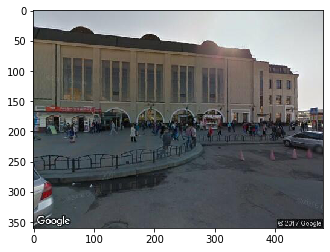

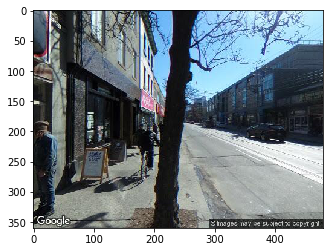

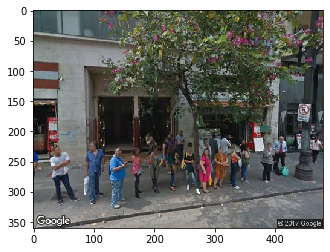

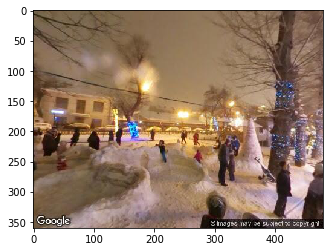

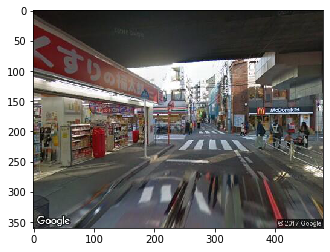

In [209]:
url_base = 'http://wekun.ing.puc.cl/static/img/'

for image_id in diff.sort_values('DIF').iloc[:5,[0]].values:
    url = url_base + image_id[0] + '.jpg'
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.show()

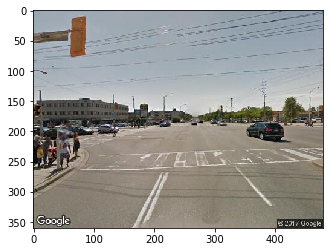

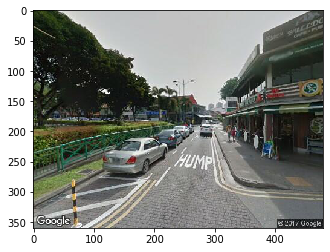

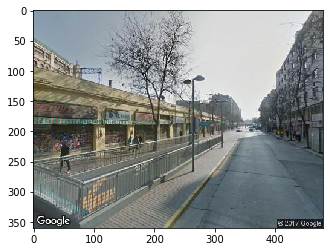

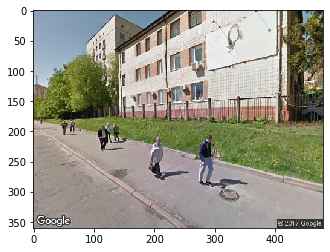

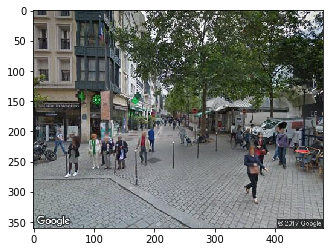

In [210]:
for image_id in diff.sort_values('DIF').iloc[-5:,[0]].values:
    url = url_base + image_id[0] + '.jpg'
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.show()

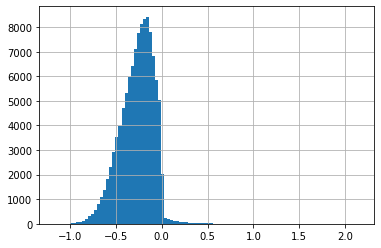

In [201]:
diff.sort_values('DIF').loc[:,'DIF'].hist(bins=100)

In [179]:
simulation = pd.concat([features.loc[(features.NA != 1),'ID'],simulation_male,simulation_female],axis=1)
simulation = simulation.dropna()

In [ ]:
simulation.sort_values('Utilidad').iloc[0:10,[-1]]

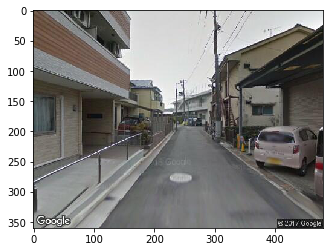

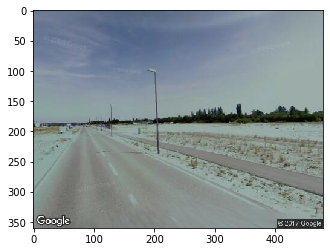

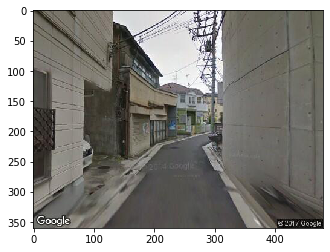

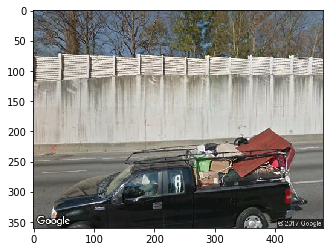

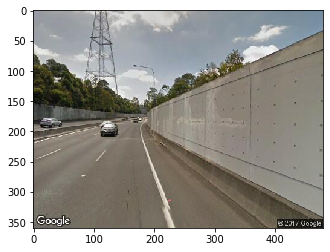

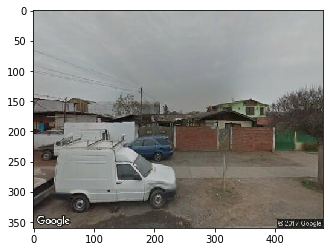

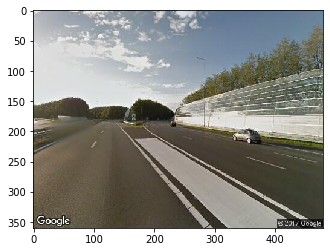

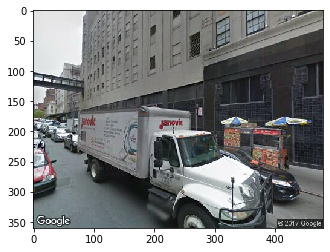

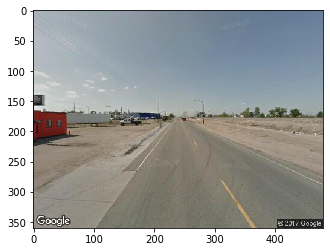

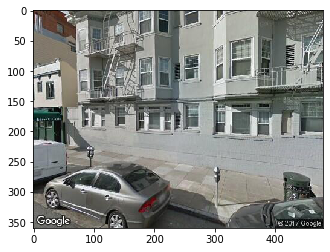

In [133]:
url_base = 'http://wekun.ing.puc.cl/static/img/'

for image_id in simulation.sort_values('Utilidad').iloc[1000:1010,[-1]].values:
    url = url_base + image_id[0] + '.jpg'
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.show()

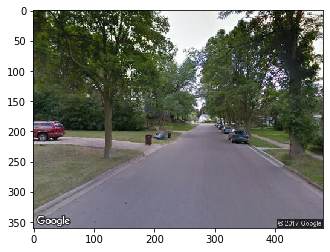

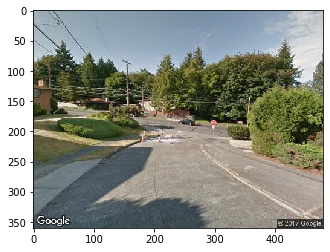

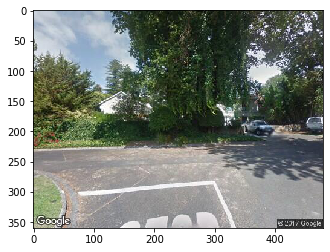

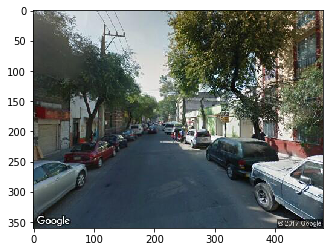

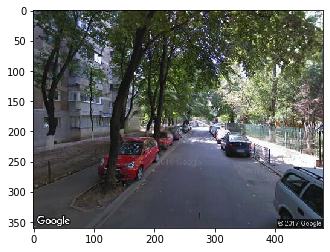

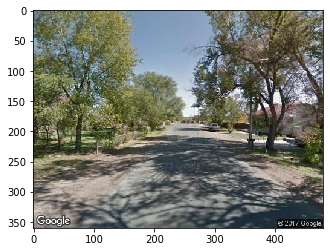

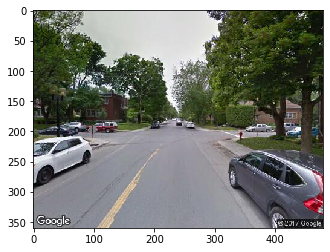

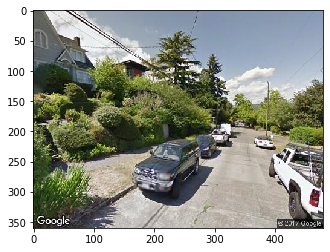

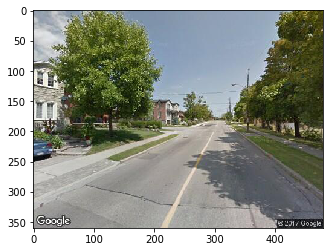

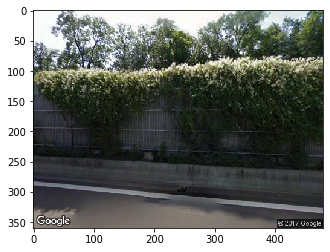

In [135]:
for image_id in simulation.sort_values('Utilidad').iloc[100_000:100_010,[-1]].values:
    url = url_base + image_id[0] + '.jpg'
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.show()

In [134]:
simulation['Utilidad']

0         2.498768
2         3.019602
3         2.576850
4         3.387325
5         3.541681
            ...   
111294    3.025975
111295    3.453785
111296    4.215325
111297    2.782270
111298    3.622375
Name: Utilidad, Length: 110644, dtype: float64

In [31]:
indice = pd.Index(['HLF N: Bicyclist',
                 'HLF N: Building',
                 'HLF N: Car',
                 'HLF N: Fence',
                 'HLF N: Pavement',
                 'HLF N: Pedestrian',
                 'HLF N: Pole',
                 'HLF N: Road',
                 'HLF N: SignSymbol',
                 'HLF N: Sky',
                 'HLF N: Tree',
                 'HLF S: Bicyclist',
                 'HLF S: Building',
                 'HLF S: Car',
                 'HLF S: Fence',
                 'HLF S: Pavement',
                 'HLF S: Pedestrian',
                 'HLF S: Pole',
                 'HLF S: Road',
                 'HLF S: SignSymbol',
                 'HLF S: Sky',
                 'HLF S: Tree',
                 'LLF: edges',
                 'LLF: mean_h',
                 'LLF: mean_l',
                 'LLF: mean_s',
                 'LLF: stdev_h',
                 'LLF: stdev_l',
                 'LLF: stdev_s',
                 'delta2',
                 'tau1',
                 'OD: bike',
                 'OD: car',
                 'OD: light',
                 'OD: person',
                 'OD: train',
                 'OD: truck',
                 'LAMBDA: car',
                 'LAMBDA: person',
                 'LAMBDA: person'])
show = pd.DataFrame(index=indice)

pd.concat([show,B.iloc[:,0],T.iloc[:,0]], axis=1).fillna('')

C:\Users\Tom\Anaconda3\envs\bio\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Value    t-test
HLF N: Bicyclist           6.4   2.35809
HLF N: Building                         
HLF N: Car            -1.14311  -3.35334
HLF N: Fence           1.21627   4.29489
HLF N: Pavement       -2.13849  -4.51471
HLF N: Pedestrian                       
HLF N: Pole                             
HLF N: Road                             
HLF N: SignSymbol      1.01108   2.87418
HLF N: Sky           -0.491163  -2.30323
HLF N: Tree           0.829313   2.38235
HLF S: Bicyclist                        
HLF S: Building      -0.916214  -3.32999
HLF S: Car                              
HLF S: Fence          0.734606    2.6443
HLF S: Pavement        1.20515   3.14682
HLF S: Pedestrian                       
HLF S: Pole           -2.23667  -4.65639
HLF S: Road            2.15362   4.85954
HLF S: SignSymbol                       
HLF S: Sky            0.291071  0.882594
HLF S: Tree             1.7392    6.7554
LAMBDA: car           0.322481   3.44498
LAMBDA: person        0.860504   3.66839
LLF: edges             9.40564    7.9457
LLF: mean_h         0.00430869   2.01175
LLF: mean_l       -0.000732253 -0.491575
LLF: mean_s         0.00329837    1.0385
LLF: stdev_h        0.00566051   1.43955
LLF: stdev_l        0.00580865   2.17361
LLF: stdev_s         0.0115263   3.31704
OD: bike              0.112186   1.82327
OD: car               0.168852   4.43327
OD: light                               
OD: person           0.0743089   2.23317
OD: train                               
OD: truck            -0.117879  -4.11954
delta2                0.807627   37.7467
tau1                 -0.416426  -16.1667

In [ ]:
pd.concat([B.iloc[:,4],T.iloc[:,4]],axis=1)

In [ ]:
# diff = (B.iloc[:,0] - B.iloc[:,2])/(B.iloc[:,2]/T.iloc[:,2])
# diff

In [ ]:
# T.to_csv('test_t.csv')
# B.to_csv('betas.csv')

In [ ]:
# results.getBetaValues()

In [ ]:
# help(results)